Makine ögrenmesi modelinin amaci \
genellenebilir yapilar ortaya koymaktir.

Belirli olaylar gözlendiinde belirli tahmin \
           sonuçlar vermektdir.


# Veri Ön işlemeye genel Bakış
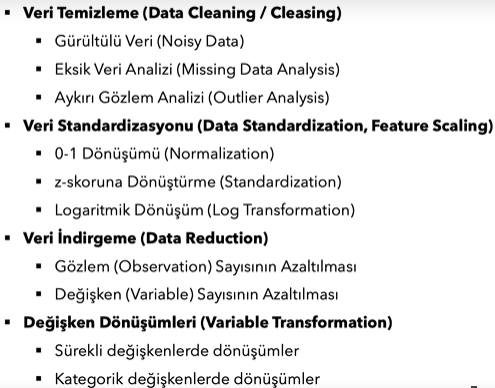

# Aykırı Gözlem

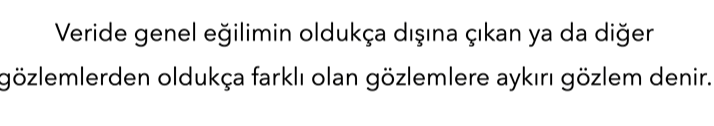

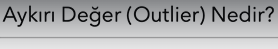
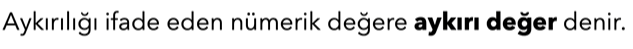

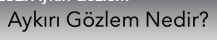
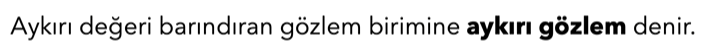

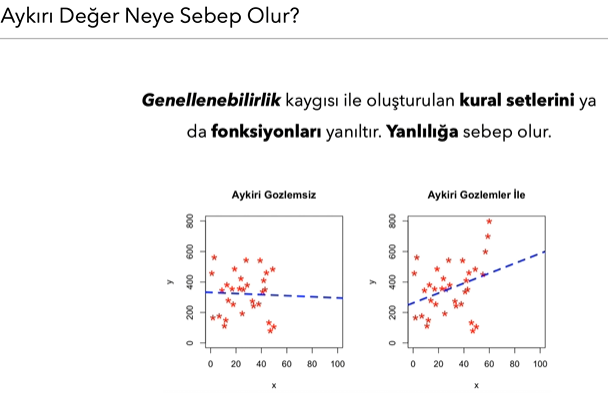

## Kime Göre Neye Göre Aykırı Gözlem ?
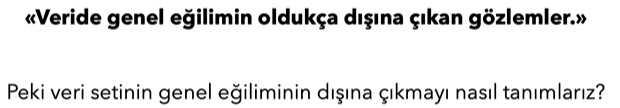

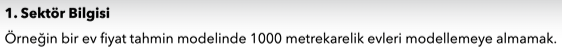
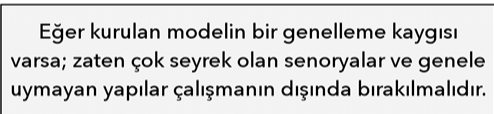

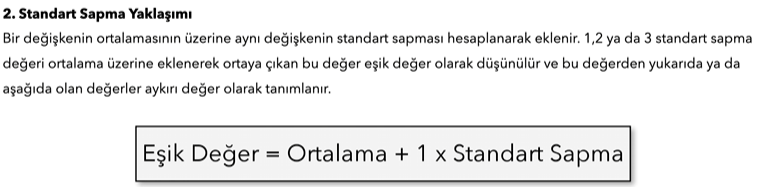

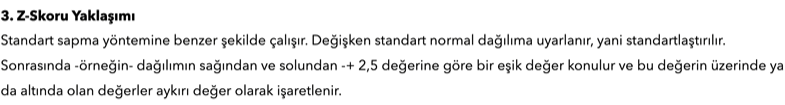
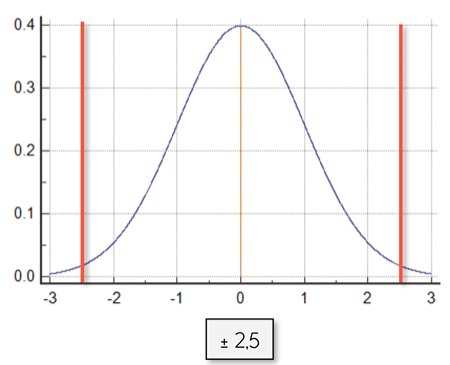

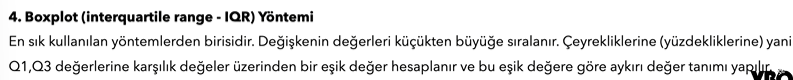
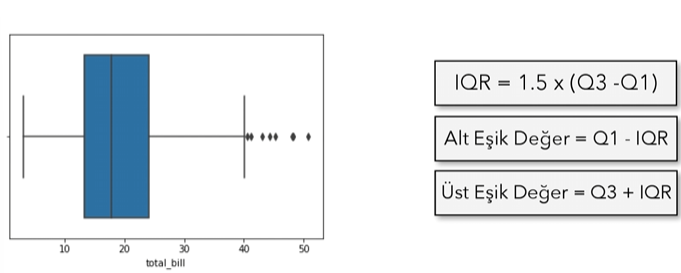

##  Aykırı Değerleri Yakalamak

In [1]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64'])
df = df.dropna()
df.head()


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

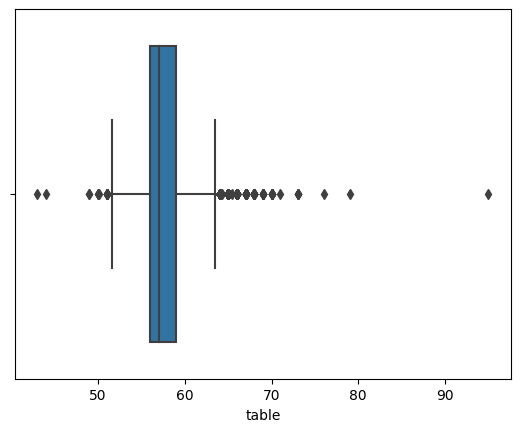

In [4]:
sns.boxplot(x = df_table);

In [5]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

In [6]:
Q1

56.0

In [7]:
Q3

59.0

In [8]:
IQR

3.0

In [9]:
alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [10]:
alt_sinir

51.5

In [11]:
ust_sinir

63.5

In [12]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [13]:
df_table[df_table < alt_sinir]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [14]:
df_table[df_table < alt_sinir].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

In [15]:
aykiri_tf = df_table < alt_sinir

## Aykırı Değer Problemini Çözmek

In [16]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### Silme Yaklaşımı

In [17]:
import pandas as pd

In [18]:
type(df_table)

pandas.core.series.Series

In [19]:
df_table = pd.DataFrame(df_table)

In [20]:
df_table.shape

(53940, 1)

In [21]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

In [22]:
t_df.shape

(53335, 1)

### Ortalama ile Doldurma

In [23]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64'])
df = df.dropna()
df.head()


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [24]:
df_table = df["table"]

In [25]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [26]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [27]:
df_table[aykiri_tf] = df_table.mean()

C:\Users\apoks\AppData\Local\Temp\ipykernel_844\3741757661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean()


In [28]:
df_table[aykiri_tf
         ]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### Baskılama Yöntemi 
eğer aykırı değer üst sınıra yakın ise üste yuvarlama \
alt sınıra yakın ise alta yuvarlama

In [29]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64'])
df = df.dropna()
df.head()


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [30]:
df_table = df["table"]

In [31]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [32]:
df_table[aykiri_tf] = alt_sinir
df_table[aykiri_tf]

C:\Users\apoks\AppData\Local\Temp\ipykernel_844\4037493889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = alt_sinir


1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

## Çok Değişkenli Aykırı Gözlem Analizi
### Local Outlier Factor
Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [2]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64','int64'])
df = df.dropna()
df.head()


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [3]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [4]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [5]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [6]:
df_scores = clf.negative_outlier_factor_

In [7]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [8]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [9]:
esik_deger =np.sort(df_scores)[13]

In [10]:
aykiri_tf = df_scores > esik_deger

In [11]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

### silme yöntemi

In [12]:
yeni_df = df[df_scores>esik_deger]

In [13]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


### Baskılama yöntemi

In [15]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [16]:
baski_degeri = df[df_scores == esik_deger]

In [17]:
aykirilar = df[~aykiri_tf]

In [18]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [26]:
aykirilar.to_records(index = False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [20]:
res = aykirilar.to_records(index = False)

In [21]:
res[:] = baski_degeri.to_records(index = False)

In [22]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [23]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [24]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [25]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


# Eksik veri Nedir?

İncelenen veri setindeki gözlemlerde eksiklik olması durumunu ifade etmektedir.

Eksik veriyi nasıl dolduracağımız veya nasıl handle edeceğimiz bize kalmıştır

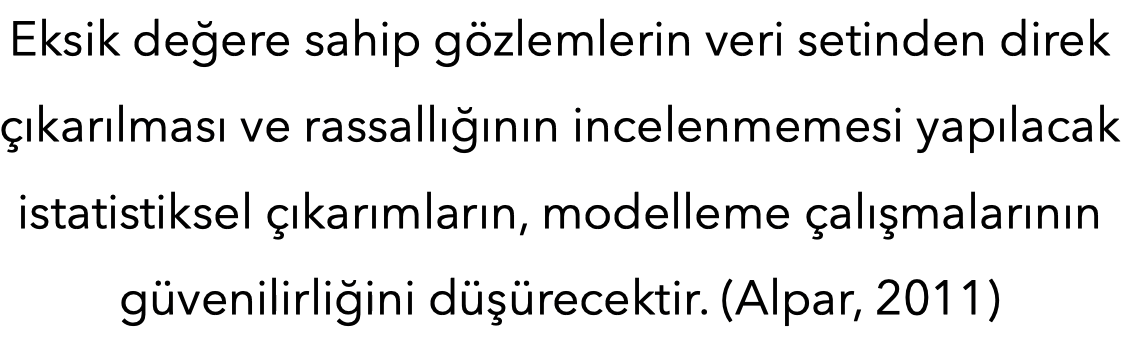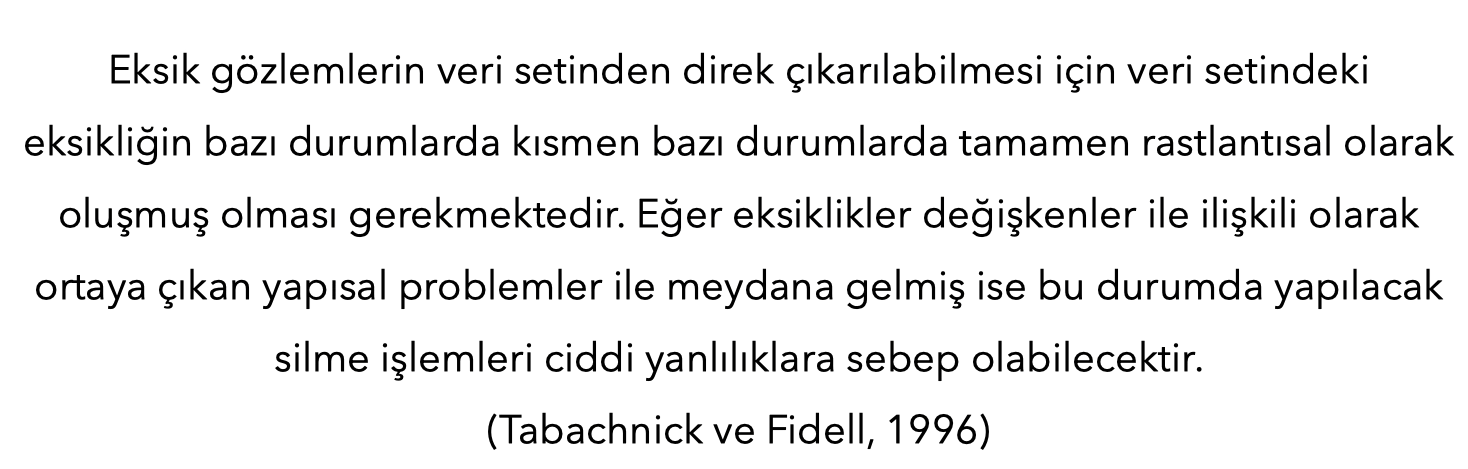

veri setinde bir eksiklik varsa:,

        1- Bu eksiklik yapısal bir eksiklik olup olmadığı bilinmelidir

        2- NA her zaman eksiklik anlamına gelmez 

        3- Bilgi kaybı!

#### Eksik Veri Türleri nelerdir?

- Tümüyle Raslantısal Kayıp: Diğer değişkenlerden ya da yapısal bir problemden kaynaklanamayan tamamen rastgele oluşan gözlemler.

- Raslantısal Kayıp: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü. 

- Raslantısal Olmayan Kayıp: Göz ardı edilemeyecek olan ve yapısal olan ve yapısal problemler ile ortaya çıkan eksiklik türü.

#### Eksik veri Rassalığının Testi 

- Görsel teknikler 
- Bağımsız iki örneklem T testi 
- Korelasyon Testi 
- Little'nin MCAR Testi 

#### Eksik veri Problemi Nasıl Giderilir ?

        - Silme Yöntemleri:
            - Gözlem ya da değişken silme yöntemi 
            - Liste bazında silme yöntemi (Listwise Method)
            - çiftler bazında silme yöntemi(Pairwise Method)
        - Değer Atama Yöntemleri 
            - Ortanca, ortalama, medyan
            - En Benzer Birime Atama (hot deck)
            - Dış kaynaklı atama 
        - Tahmine dayalı Yöntemler 
            - Makine Öğrenmesi 
            - EM
            - Çoklu atama 

## Eksik Veri Analizi

## Hızlı Çözüm 

In [45]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [30]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [31]:
df.isnull().sum().sum()

7

In [32]:
df.isnull()

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [34]:
df[df.isnull().any(axis=1)] # en az bir tane eksik gözlem olanları getir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [35]:
df[df.notnull().all(axis=1)] # hepsi dolu  olanları getir

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [36]:
df[df["V1"].notnull() & df["V2"].notnull()& df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik değerlerin direkt silinmesi 

In [38]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit Değer Atama 

In [40]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7     9.0
8    15.0
Name: V1, dtype: float64

In [41]:
df["V1"].mean()

6.0

In [42]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [43]:
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [46]:
## birden fazla değişken(sütun) için bu işlemleri tekrar tekrar yazacak mıyız?- hayır
df.apply(lambda x: x.fillna(x.mean()), axis=0 )

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


## Eksik Veri Yapısının Görselleştirilmesi 

In [48]:
import  missingno as msno ## 

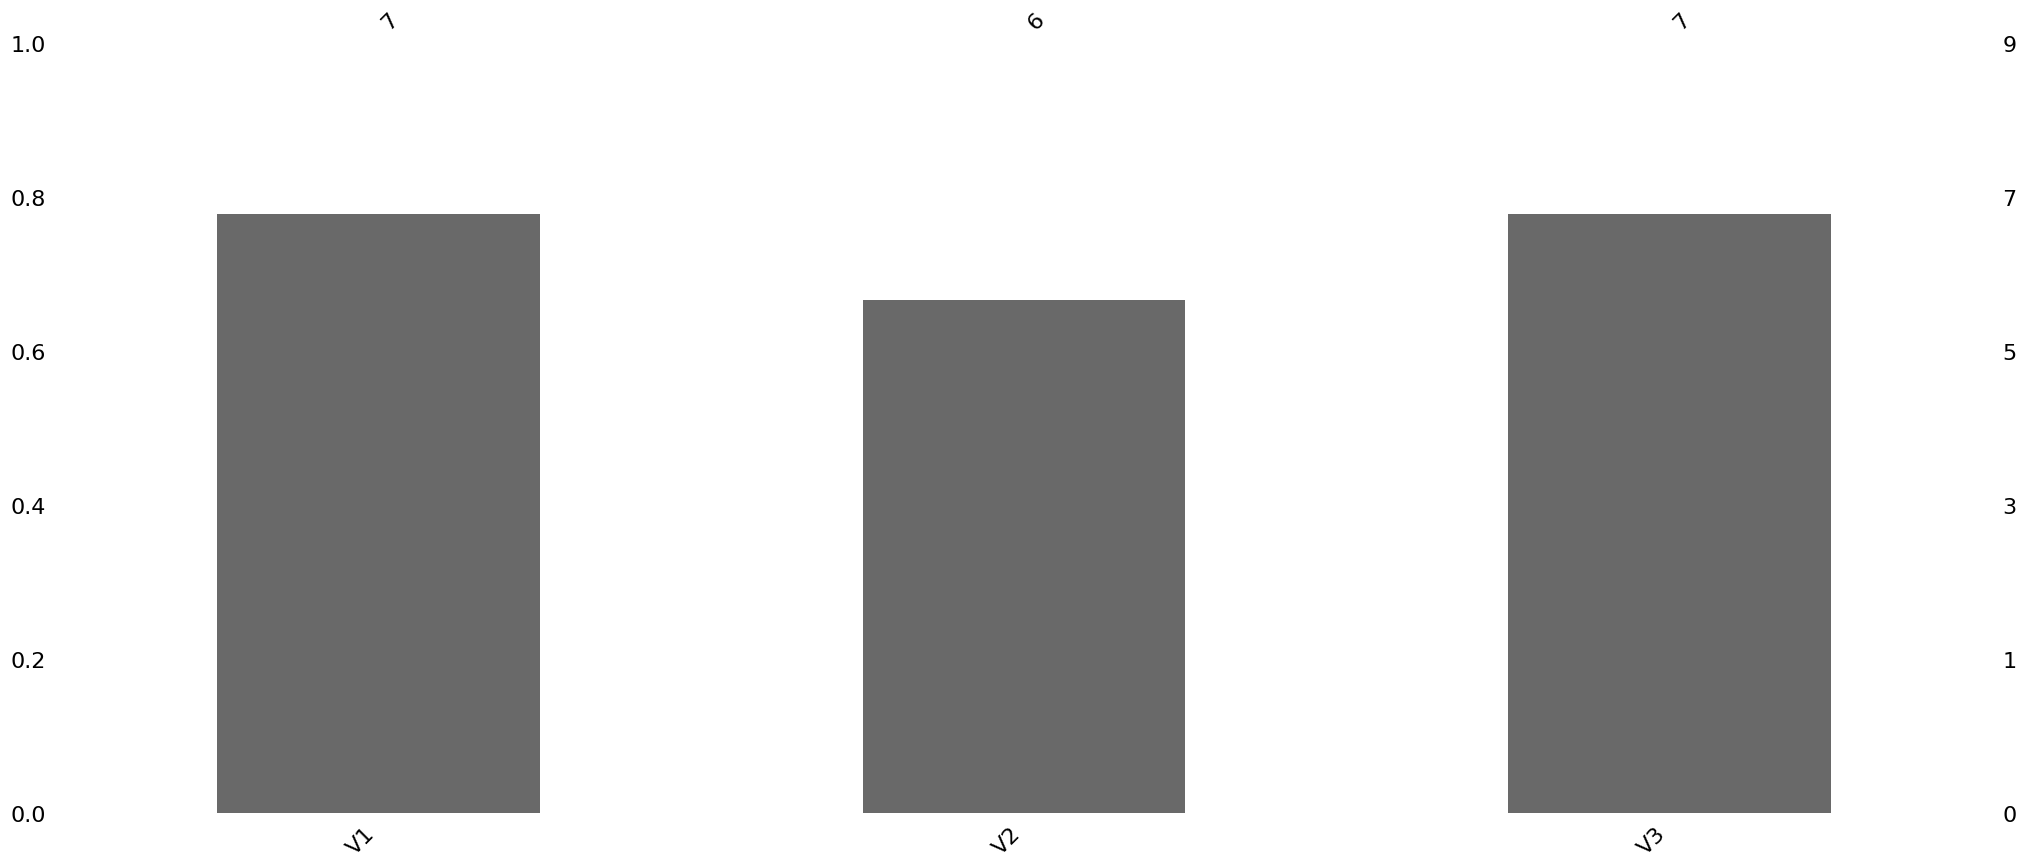

In [49]:
msno.bar(df);

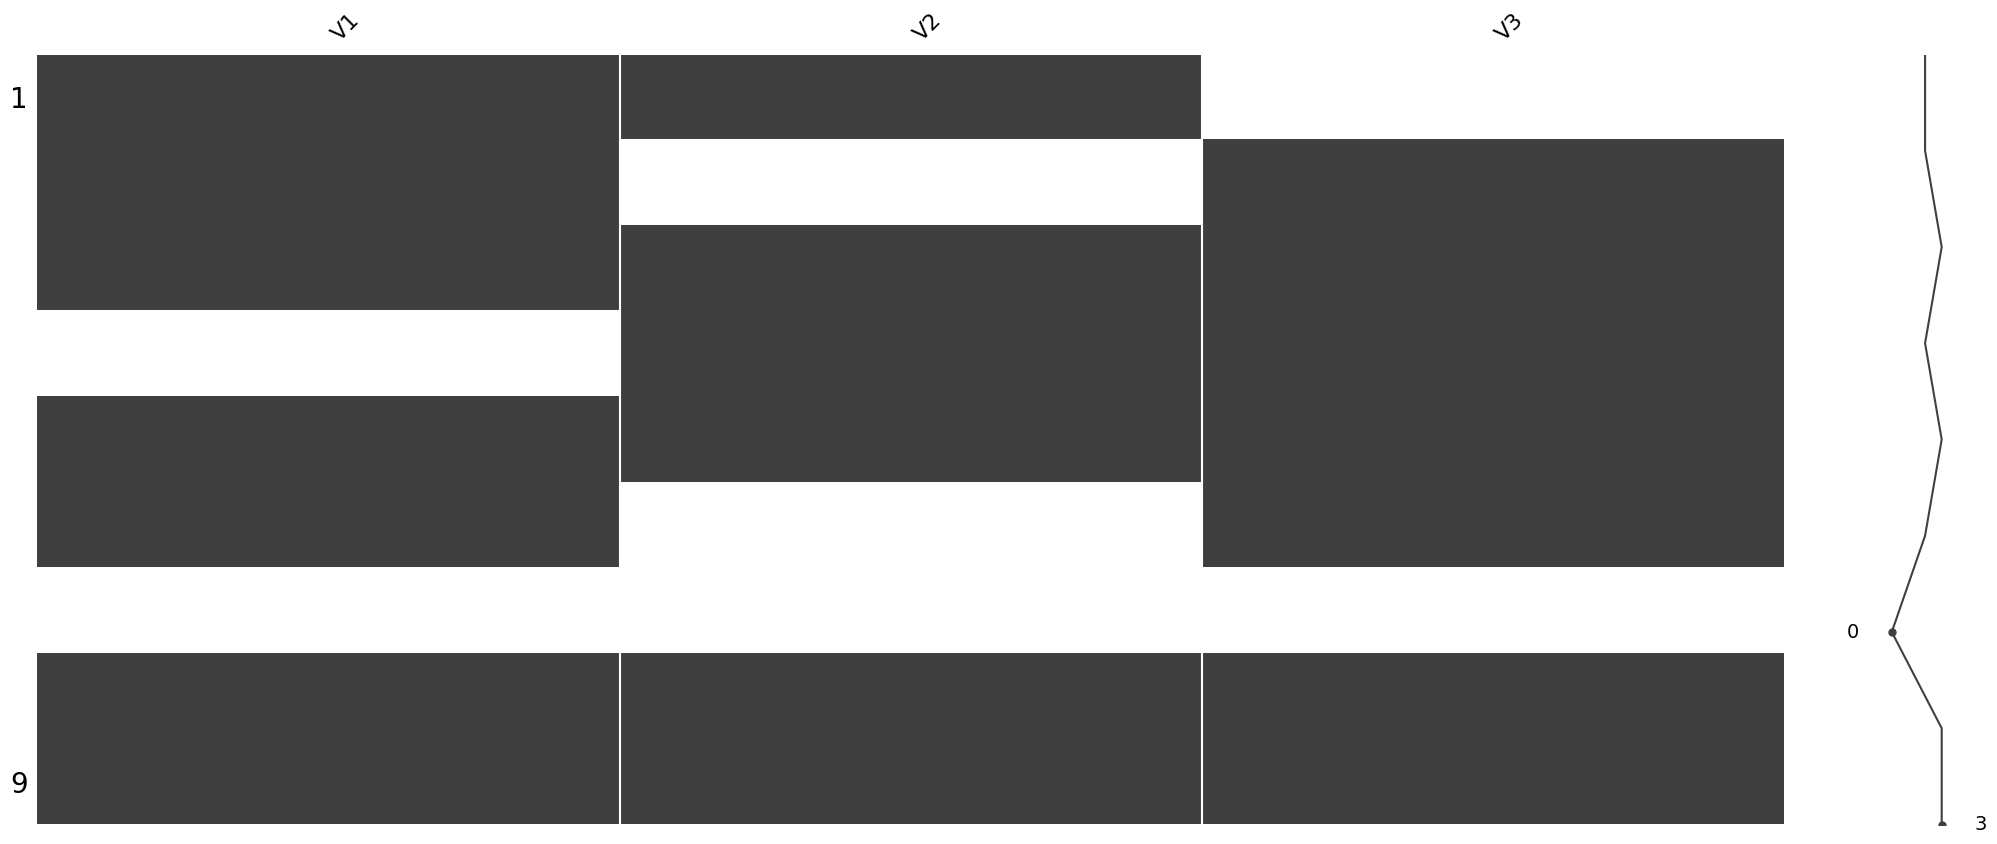

In [50]:
msno.matrix(df);

In [51]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [52]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [53]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

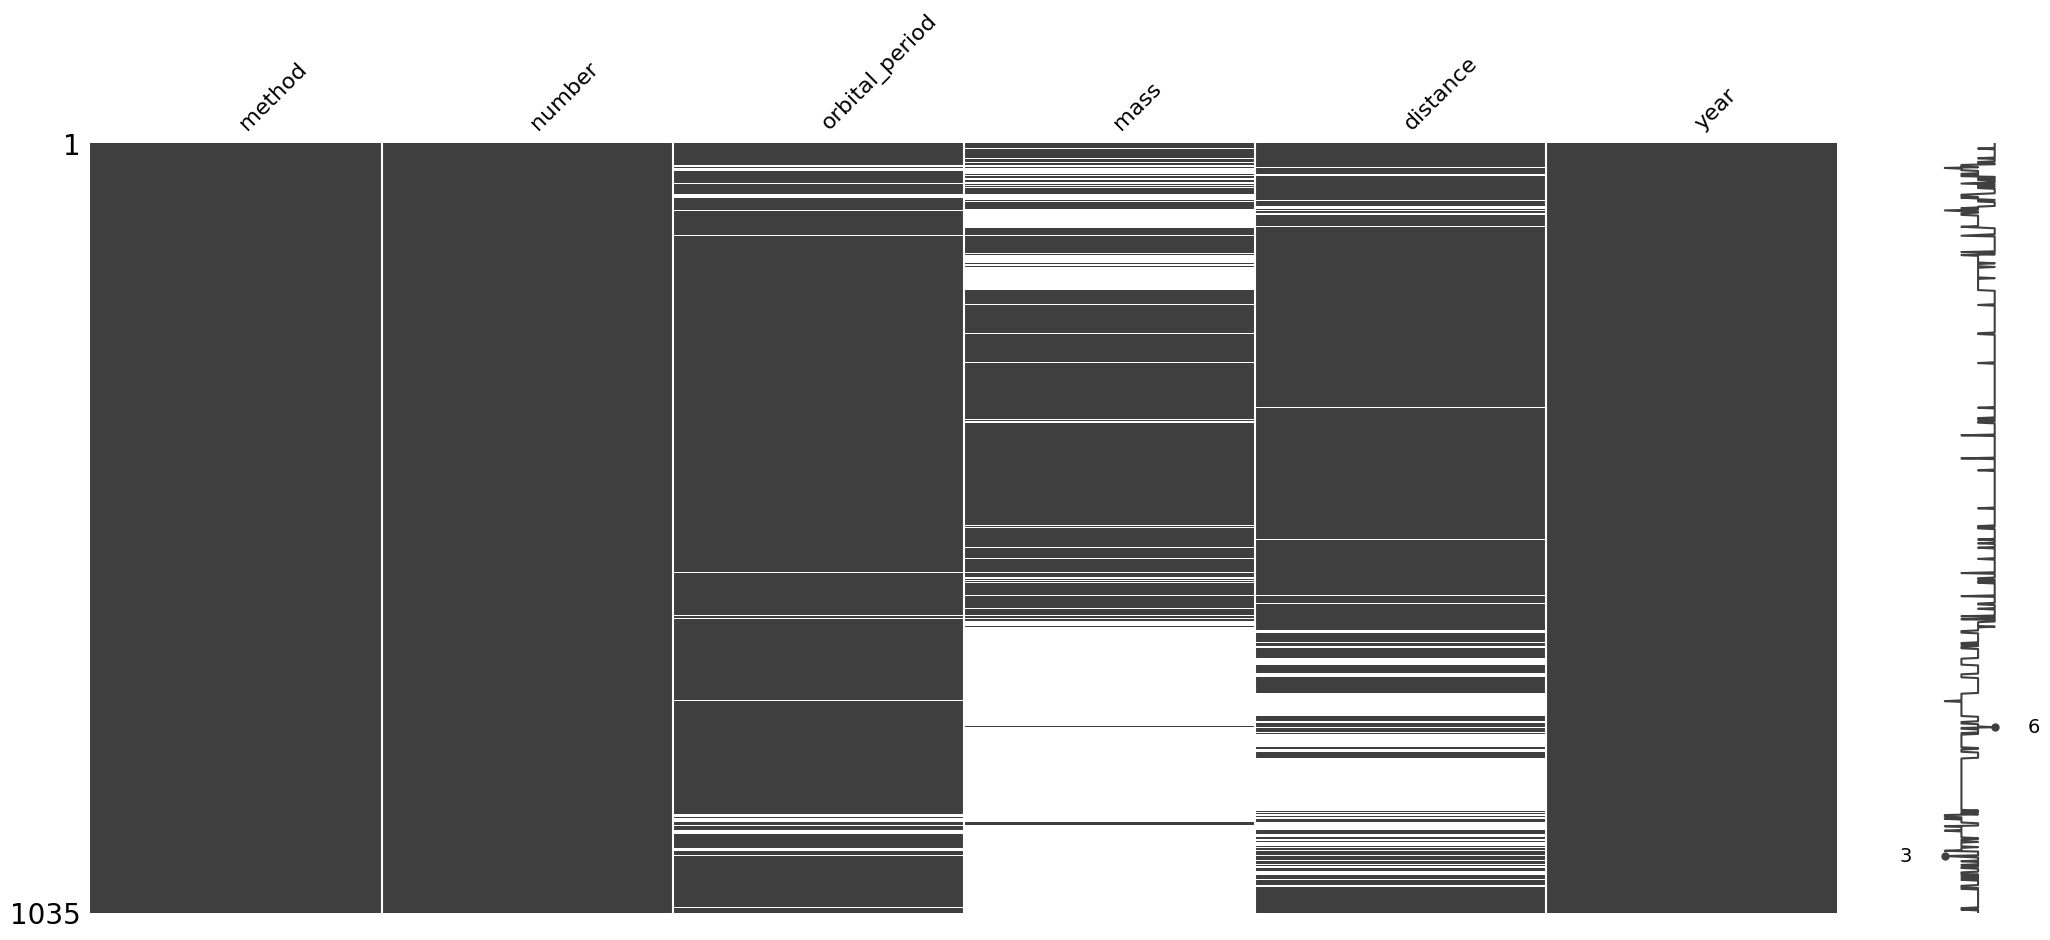

In [54]:
msno.matrix(df);

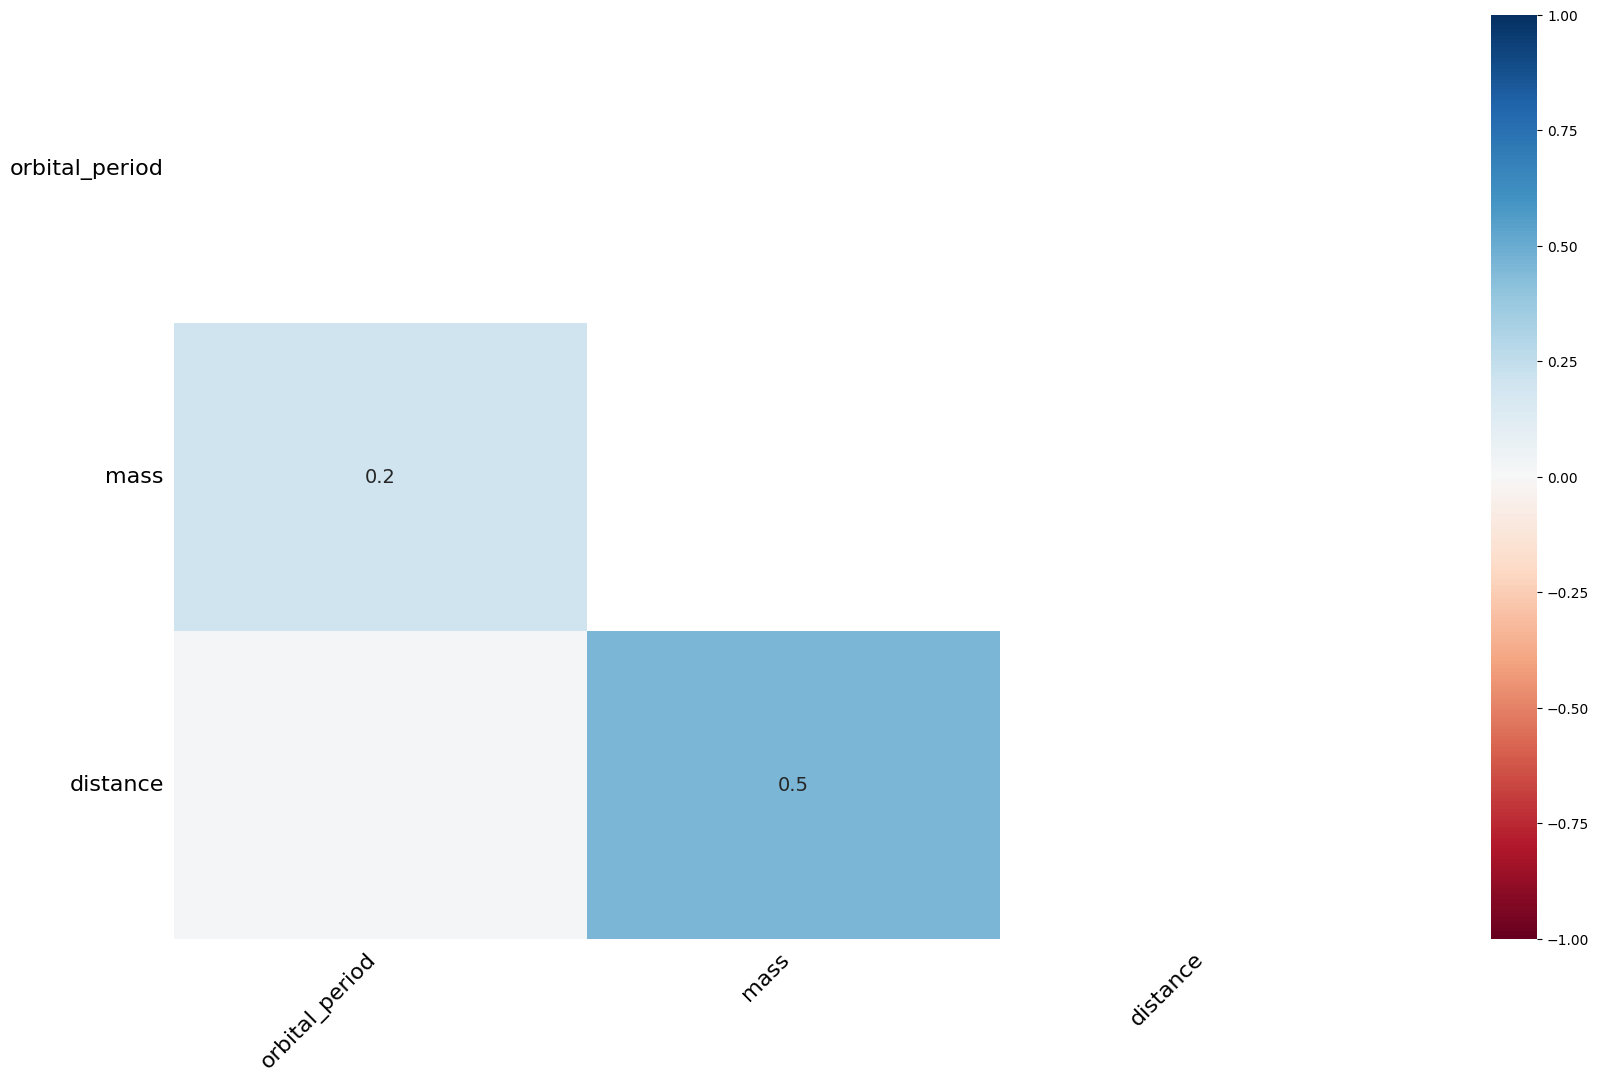

In [55]:
msno.heatmap(df);

## Silme Yöntemleri

In [56]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [57]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [58]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [59]:
df.dropna(how = "all") # sadece bütün değerleri Null olan gözlemi silme 

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [60]:
df.dropna(axis = 1) # en az bir eksik gözlem bulunan değişkeni sil 

""
0
1
2
3
4
5
6
7
8


In [61]:
# Tüm değerleri Na olan değişkenleri silmek istiyorsak
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [62]:
df["sil_beni"] = np.nan

In [63]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [64]:
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [65]:
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [66]:
df.dropna(axis = 1, how = "all", inplace = True)

In [67]:
df


,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Değer Atama Yöntemleri

In [2]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### sayısal degiskenlerde atama 

In [69]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [70]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [71]:
#tum degiskenler icin birinci yol
df.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [ ]:
#ikinci yol

In [72]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [73]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [74]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [75]:
#ucuncu yol

In [76]:
df.where(pd.notna(df), df.mean(), axis = "columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Kategorik Değişken Kırılımında Değer Atama

In [3]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [7]:
## maası departmana göre ortalamasını alıp eksik değerleri doldurabiliriz 
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [12]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

### Kategorik Değişkenler için Eksik Değer Atama

In [13]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [15]:
df["departman"].mode()[0]

'IK'

In [16]:
df["departman"].fillna(df["departman"].mode()[0]) # en çok tekrar eden değer ile doldurma 

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [17]:
## öncesi ve sonrası değer ile doldurabiliriz 
#sonrası:
df["departman"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [18]:
# Öncesi:
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

### Tahmine Dayalı Değer Atama Yöntemleri 

In [27]:
import seaborn as sns
import missingno as msno
import numpy as np
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [28]:
# age  isimli değişkeni dolduracağız
!pip install ycimpute

In [29]:
from ycimpute.imputer import knnimput

In [48]:
var_names = list(df)

In [49]:
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [31]:
n_df = np.array(df)

In [32]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [33]:
n_df.shape

(891, 6)

In [34]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.073
Imputing row 101/891 with 0 missing, elapsed time: 0.074
Imputing row 201/891 with 0 missing, elapsed time: 0.074
Imputing row 301/891 with 1 missing, elapsed time: 0.075
Imputing row 401/891 with 0 missing, elapsed time: 0.075
Imputing row 501/891 with 0 missing, elapsed time: 0.075
Imputing row 601/891 with 0 missing, elapsed time: 0.076
Imputing row 701/891 with 0 missing, elapsed time: 0.076
Imputing row 801/891 with 0 missing, elapsed time: 0.076


In [35]:
type(dff)

numpy.ndarray

In [36]:
dff = pd.DataFrame(dff, columns = var_names)

In [37]:
type(dff)

pandas.core.frame.DataFrame

In [38]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [51]:
## random forests 

In [7]:
import seaborn as sns
import missingno as msno
import pandas as pd
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [8]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [9]:
var_names = list(df)

In [10]:
import numpy as np
n_df = np.array(df)

In [11]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [12]:
dff = pd.DataFrame(dff, columns = var_names)

NameError: name 'dff' is not defined

In [13]:
dff.isnull().sum()

NameError: name 'dff' is not defined

In [ ]:
## EM 

In [14]:
import seaborn as sns
import missingno as msno
import pandas as pd
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [15]:
from ycimpute.imputer import EM

In [16]:
var_names = list(df)

In [17]:
import numpy as np
n_df = np.array(df)

In [18]:
dff = EM().complete(n_df)

In [19]:
dff = pd.DataFrame(dff, columns = var_names)

In [20]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

### Değişken Standardizasyonu (veri Standardizasyonu)

değişken standardizasyonunda değişkenin taşıdığı ddeğer değişir fakat niteliği özelliği değişmez(80. sırada ise 80. olmaya devam eder)

değişken dönüştürmek ise değişkenin her şeyi değişebilir

In [ ]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [ ]:
from sklearn import preprocessing 

In [ ]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [ ]:
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


#### Normalizasyon

#### Min-Max Dönüşümü

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [ ]:
scaler.fit_transform(df)

array([[100.        , 128.57142857, 111.11111111],
       [133.33333333, 128.57142857, 177.77777778],
       [183.33333333, 100.        , 100.        ],
       [166.66666667, 142.85714286, 111.11111111],
       [200.        , 200.        , 200.        ]])

### Değişken Dönüşümleri

değeişkenleri dönüştürürken değişkenin taşıdığı mevcut bilgiyi değiştiriyormuyuz ?

In [21]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 0-1 Dönüşümü

In [22]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()

In [23]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [24]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [25]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


#### "1 ve Diğerleri (0) " Dönüşümü

In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [27]:
df["day"].str.contains("Sun")

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [30]:
df["sex"].str.contains("Male")

0      False
1       True
2       True
3       True
4      False
       ...  
239     True
240    False
241     True
242     True
243    False
Name: sex, Length: 244, dtype: bool

In [34]:
import numpy as np 
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

In [35]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


#### Çok Sınıflı Dönüşüm

In [36]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [37]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [38]:
#cok dikkat 
#yanlış çıkarımlar yapmamaya dikkat etmeliyiz(one hot encoding) 

#### One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [ ]:
df_one_hot = pd.get_dummies(df, columns = ["sex"], prefix = ["sex"])

In [ ]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [ ]:
pd.get_dummies(df, columns = ["day"], prefix = ["day"]).head()

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1


###  Veri Standardizasyonu - Dönüşümü

#### Standartlaştırma

In [1]:
import numpy as np 
import pandas as pd 

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame({"V1":V1,
                   "V2":V2,
                   "V3":V3})
df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [3]:
from sklearn import preprocessing

In [4]:
preprocessing.scale(df) # ortalaması 0 std si 1 olacak şekilde bir stamndartlaştırma işlemi 

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

#### Normaliize

In [6]:
preprocessing.normalize(df) # 0-1 aralığında olacak şekilde

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

#### Min-Max Scaler

In [8]:
scaler = preprocessing.MinMaxScaler(feature_range=(10,20))
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

#### Binarize Dönüşüm 

In [9]:
# bu değişkenin dönüştürülmesi işlemidir taşımış olduğu bilgi ve olçek değişiyor 

In [10]:
binarizer = preprocessing.Binarizer(threshold=5).fit(df)


In [11]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

#### 0-1 Dönüşümü 

In [12]:
##kategorik değişken sürekli değişkene çevriliyor oslında

In [20]:
import seaborn as sns 
import numpy as np
import pandas as pd
tips = sns.load_dataset('tips')
df = tips.copy()
df_l = df.copy()

In [6]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df_l["yeni_sex"] = df_l["sex"].cat.codes # yakaladığı değeri 1 den dönüştürmeye başlar

In [8]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


#### 1 ve Diğerleri (0) Dönüşümü 

In [9]:
#
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [11]:
df_l["yeni_gun"] = np.where(df_l["day"].str.contains("Sun"), 1, 0)

In [12]:
df_l.head(5)

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1


#### Çok Sınıflı Dönüşüm 

In [15]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [16]:
df_l["daha_yeni_gun"] = lbe.fit_transform(df_l["day"])

In [17]:
df_l.head(10)

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_gun,daha_yeni_gun
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,2
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1,2
6,8.77,2.00,Male,No,Sun,Dinner,2,0,1,2
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1,2
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1,2
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1,2


 bu dönüşümde algoritmaların kafası karışmakta ve kategorik değişkenlerin bağımlı değişkene olan etkileri bozullmaktadır bu sebeple one hot encoding yapılmalıdır

#### One-hot Encoder Dönüşümü ve Dummy Değiken Tuzağı

In [18]:
df_one_hot = df.copy()

In [22]:
pd.get_dummies(df_one_hot, columns=["sex"], prefix=["sex"], dtype=int).head()

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1


In [23]:
## ya birdan fazla değişken varsa ?
pd.get_dummies(df_one_hot, columns=["day"], prefix=["day"], dtype=int).head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,0,1


#### Sürekli Değişkeni Kategorik Değişkene çevirmek

In [26]:
from sklearn import preprocessing

In [27]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
dff = df.select_dtypes(include=["float64","int64"])

In [29]:
est = preprocessing.KBinsDiscretizer(n_bins=[3,2,2], encode="ordinal", strategy="quantile").fit(dff)

In [30]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [1., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

#### Değişkeni indexe , İndexi Değişkene Dönüştürme

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
df["yeni_degisken"] = df.index
df

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,4
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,239
240,27.18,2.00,Female,Yes,Sat,Dinner,2,240
241,22.67,2.00,Male,Yes,Sat,Dinner,2,241
242,17.82,1.75,Male,No,Sat,Dinner,2,242


In [35]:
#var oolan değişkeni index olarak atama 

df["yeni_degisken"] = df["yeni_degisken"] + 10
df

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,249
240,27.18,2.00,Female,Yes,Sat,Dinner,2,250
241,22.67,2.00,Male,Yes,Sat,Dinner,2,251
242,17.82,1.75,Male,No,Sat,Dinner,2,252


In [36]:
df.index = df["yeni_degisken"]
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_degisken
yeni_degisken,,,,,,,,
10,16.99,1.01,Female,No,Sun,Dinner,2,10
11,10.34,1.66,Male,No,Sun,Dinner,3,11
12,21.01,3.50,Male,No,Sun,Dinner,3,12
13,23.68,3.31,Male,No,Sun,Dinner,2,13
14,24.59,3.61,Female,No,Sun,Dinner,4,14


## Bölüm Sonu Değerlendirmesi

Veri Ön İşleme 

Aykırı Gözlem Analizi

Eksik Gözlem Analizi

Değişken Standartlaştırma

Değişken Dönüştürme